8151
Epoch 1/10
115/115 [==============================] - 31s 266ms/step - loss: 4.8960 - accuracy: 0.0255 - val_loss: 4.4631 - val_accuracy: 0.0502
Epoch 2/10
115/115 [==============================] - 32s 275ms/step - loss: 3.8252 - accuracy: 0.1583 - val_loss: 3.8714 - val_accuracy: 0.1385
Epoch 3/10
115/115 [==============================] - 32s 279ms/step - loss: 2.9193 - accuracy: 0.3520 - val_loss: 3.4501 - val_accuracy: 0.2328
Epoch 4/10
115/115 [==============================] - 33s 284ms/step - loss: 2.2413 - accuracy: 0.4993 - val_loss: 3.4066 - val_accuracy: 0.2488
Epoch 5/10
115/115 [==============================] - 32s 277ms/step - loss: 1.7374 - accuracy: 0.6145 - val_loss: 3.1964 - val_accuracy: 0.3015
Epoch 6/10
115/115 [==============================] - 32s 276ms/step - loss: 1.3366 - accuracy: 0.7069 - val_loss: 3.1701 - val_accuracy: 0.3002
Epoch 7/10
115/115 [==============================] - 32s 277ms/step - loss: 1.0231 - accuracy: 0.7868 - val_loss: 3.2383 - v

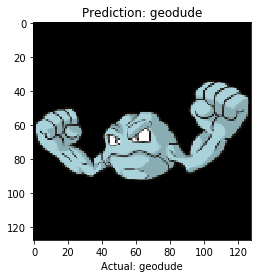

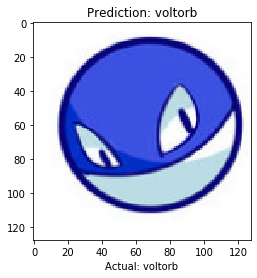

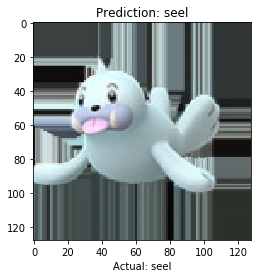

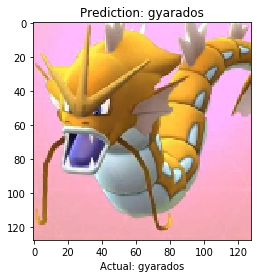

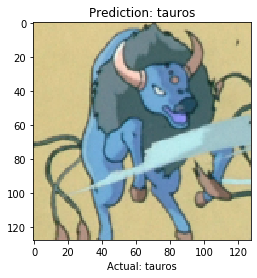

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import re

DATADIR = "C:/Users/selvaa/images/master" #where the images are located
POKEMON = ["missingno", "bulbasaur", "ivysaur", "venusaur", "charmander", "charmeleon", "charizard", 
           "squirtle", "wartortle", "blastoise", "caterpie", "metapod", "butterfree", 
           "weedle", "kakuna", "beedrill", "pidgey", "pidgeotto", "pidgeot", "rattata", 
           "raticate", "spearow", "fearow", "ekans", "arbok", "pikachu", "raichu", "sandshrew", 
           "sandslash", "nidoran♀", "nidorina", "nidoqueen", "nidoran♂", "nidorino", "nidoking", 
           "clefairy", "clefable", "vulpix", "ninetales", "jigglypuff", "wigglytuff", "zubat", 
           "golbat", "oddish", "gloom", "vileplume", "paras", "parasect", "venonat", "venomoth", 
           "diglett", "dugtrio", "meowth", "persian", "psyduck", "golduck", "mankey", "primeape", 
           "growlithe", "arcanine", "poliwag", "poliwhirl", "poliwrath", "abra", "kadabra",
           "alakazam", "machop", "machoke", "machamp", "bellsprout", "weepinbell", "victreebel",
           "tentacool", "tentacruel", "geodude", "graveler", "golem", "ponyta", "rapidash", "slowpoke",
           "slowbro", "magnemite", "magneton", "farfetch’d", "doduo", "dodrio", "seel", "dewgong", "grimer",
           "muk", "shellder", "cloyster", "gastly", "haunter", "gengar", "onix", "drowzee", "hypno", "krabby",
           "kingler", "voltorb", "electrode", "exeggcute", "exeggutor", "cubone", "marowak", "hitmonlee",
           "hitmonchan", "lickitung", "koffing", "weezing", "rhyhorn", "rhydon", "chansey", "tangela",
           "kangaskhan", "horsea", "seadra", "goldeen", "seaking", "staryu", "starmie", "mr. mime", "scyther", 
           "jynx", "electabuzz", "magmar", "pinsir", "tauros", "magikarp", "gyarados", "lapras", "ditto", 
           "eevee", "vaporeon", "jolteon", "flareon", "porygon", "omanyte", "omastar", "kabuto", "kabutops", 
           "aerodactyl", "snorlax", "articuno", "zapdos", "moltres", "dratini", "dragonair", "dragonite", 
           "mewtwo", "mew"]

training_data = []
test_data = []

IMG_SIZE = 128

def to_int(unsafe_string):
    return int(unsafe_string.strip("-abcdefghijklmnopqrstuvwxyz"))

def create_training_data():
    #adding train1 folder
    path = os.path.join(DATADIR, "train1")
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img))
            #resize to 128x128
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            training_data.append([new_array, int(img[:-4])])
        except Exception as e:
            print(e)
            
    #adding train2 folder
    path = os.path.join(DATADIR, "train2")
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img))
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            training_data.append([new_array, int(img[:-4])])
        except Exception as e:
            print(e)
            
    #adding PokemonData
    bigData = "C:/Users/selvaa/images/master/train3"
    for i in range(151):
        path = os.path.join(bigData, str(i))
        if i == 0:
            continue
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, i])
            except Exception as e:
                pass
    #adding test folder to test_data
    path = os.path.join(DATADIR, "train4")
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path,img))
            index = to_int(img[0:3])
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            training_data.append([new_array, index])
        except Exception as e:
            print(e)

def create_test_data():
    testDir = "C:/Users/selvaa/images"
    path = os.path.join(testDir, "images")
    for pkmn in POKEMON:
        pkmn += ".png"
        for img in os.listdir(path):
            if pkmn == img:
                try:
                    img_array = cv2.imread(os.path.join(path,img))
                    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                    training_data.append([new_array, POKEMON.index(pkmn[:-4])])
                except Exception as e:
                    print(e)
    
            
create_training_data()
random.shuffle(training_data)

create_test_data();
random.shuffle(test_data)

# # seeing the data
# for i in range(5):
#     plt.grid(False)
#     plt.imshow(test_data[i][0], cmap=plt.cm.binary)
#     plt.xlabel("Labels:" + POKEMON[test_data[i][1]])
#     plt.show()

x = []
y = []

for img, label in training_data:
    x.append(img)
    y.append(label)

x = np.array(x)
y = np.array(y)

x = x/255.0

print(len(x))

# for i in range(5):
#     plt.grid(False)
#     plt.imshow(x[i], cmap=plt.cm.binary)
#     plt.xlabel("Labels:" + y[i])
#     plt.show()

model = Sequential()
model.add(Conv2D(3, (3,3), input_shape=(128,128,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(304, activation='relu'))
model.add(Dense(152, activation='softmax'))

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
    optimizer='adam', 
    metrics=['accuracy'])
model.fit(x, y, batch_size=64, epochs=10, verbose=1, validation_split=0.1)

a = []
b = []

random.shuffle(training_data)

for img, label in training_data:
    a.append(img)
    b.append(label)
    
a = np.array(a)
b = np.array(b)

prediction = model.predict(a)

for i in range(5):
    plt.grid(False)
    plt.imshow(a[i], cmap=plt.cm.binary)
    plt.xlabel("Actual: " + POKEMON[b[i]])
    plt.title("Prediction: " + POKEMON[np.argmax(prediction[i])])
    plt.show()
    
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")

In [6]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
model.save_weights("model.h5")